<a href="https://colab.research.google.com/github/Anyajain-Tech/AI-Project/blob/main/willIGetPlaced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np, pandas as pd       #numpy for numerical computation  pandas for reading csv file
from sklearn.model_selection import train_test_split  #uses to divinding dataset  and for testing andtesting typically 80% for training
                                                      # and 20% for testing model performance for placement prediction
import matplotlib.pyplot as plt   #uses for plotting graph to show visual analysis
import seaborn as sns             #uses for plotting
import io
from sklearn.preprocessing import StandardScaler , OneHotEncoder    #StandardScaler for better perforamance of random forest
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [16]:
df = pd.read_csv("Placement_BeginnerTask01.csv" )

In [17]:
df.info()   #it provide concise summary of data it display details like column names , non-null count ,datatype and menmory usage
print(f"Shape of Dataframe {df.shape} ")  # it print (rows , column)
print()    # for next line
df.head()  # to display first 5 rows(or specifffed number of rows) for data inspection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB
Shape of Dataframe (10000, 12) 



,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [8]:
y=df["PlacementStatus"].map({"NotPlaced" : 0 , "Placed" : 1})   # to maping a string to integer
sns.boxplot(x="PlacementStatus" , y="CGPA" ,data=df ,hue= "PlacementStatus",palette="Set2")  # comparing data of placement status to cgpa
plt.title("Comparsion of dataset on bases  of cgpa and placing status" , color="blue")  # giving title to graph
plt.tight_layout()
plt.show()

KeyError: 'PlacementStatus'

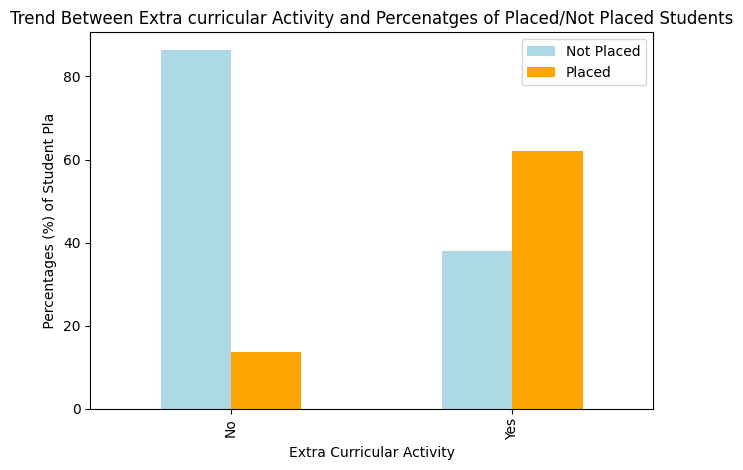

'counts.plot(kind= "bar" ,color= ["lightblue" , "orange"])\nplt.xlabel("Extra Curricular Activities")\nplt.ylabel("Number of Students")\nplt.title("Trend Between the Extra curricular Activities and Number of Students Placed/ Not Placed")\nplt.tight_layout()\nplt.show()'

In [ ]:
counts=pd.crosstab(df["ExtracurricularActivities"] , df["PlacementStatus"])   # to plot together
percentages= round(counts.div(counts.sum(axis=1) , axis =0) *100 ,2)
percentages.plot(kind="bar" , color =["lightblue" , "orange"])
plt.xlabel("Extra Curricular Activity")
plt.ylabel(" Percentages (%) of Student Pla ")
plt.legend(["Not Placed" , "Placed" ])
plt.title("Trend Between Extra curricular Activity and Percenatges of Placed/Not Placed Students")
plt.tight_layout()
plt.show()

"""counts.plot(kind= "bar" ,color= ["lightblue" , "orange"])
plt.xlabel("Extra Curricular Activities")
plt.ylabel("Number of Students")
plt.title("Trend Between the Extra curricular Activities and Number of Students Placed/ Not Placed")
plt.tight_layout()
plt.show()"""

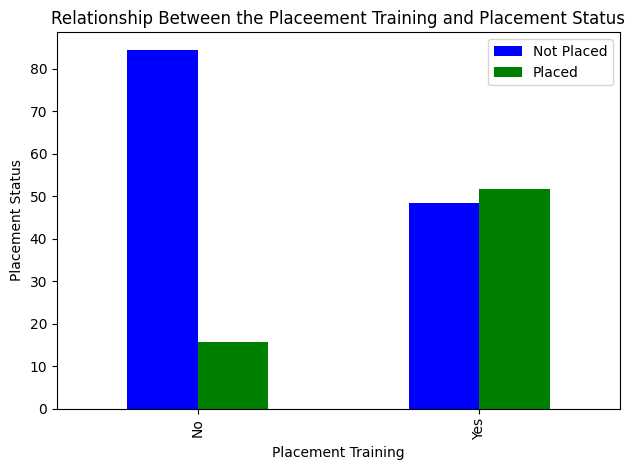

In [ ]:
train=pd.crosstab(df["PlacementTraining"] ,df["PlacementStatus"])
percent=round(train.div(train.sum(axis=1)  ,  axis=0 ) *100 ,2)
# print(train )
# print(percent)

# Plot Relationship Between the Placeement Training and Placement Status
percent.plot(kind="bar" , color = ["blue" , "green"])
plt.xlabel("Placement Training")
plt.ylabel("Placement Status")
plt.title("Relationship Between the Placeement Training and Placement Status")
plt.legend(["Not Placed" , "Placed" ])
plt.tight_layout()


In [ ]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [ ]:
sumUp= df.groupby("PlacementStatus")[["Internships" ,"Projects" ,"Workshops/Certifications" ,"SoftSkillsRating"]].mean()
print(sumUp)

                 Internships  Projects  Workshops/Certifications  \
PlacementStatus                                                    
NotPlaced           0.901775  1.675857                   0.73462   
Placed              1.253038  2.511556                   1.39838   

                 SoftSkillsRating  
PlacementStatus                    
NotPlaced                4.174393  
Placed                   4.530760  


<Axes: xlabel='PlacementStatus', ylabel='SoftSkillsRating'>

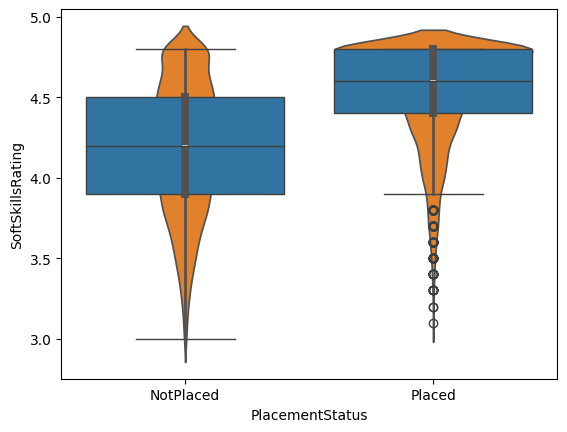

In [ ]:
sns.boxplot(x=df["PlacementStatus"] , y=df["SoftSkillsRating"] )
sns.violinplot(x=df["PlacementStatus"] , y=df["SoftSkillsRating"])

<Axes: xlabel='AptitudeTestScore', ylabel='SSC_Marks'>

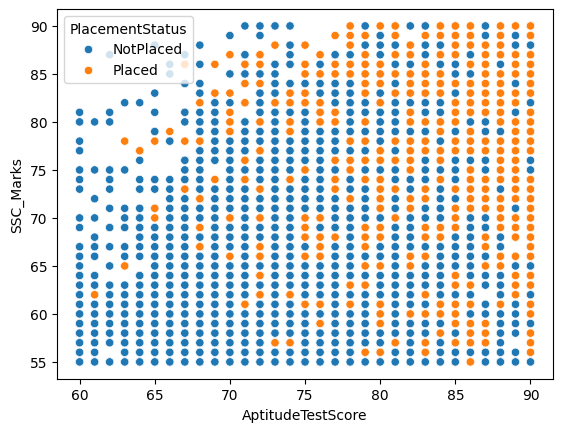

In [ ]:
sns.scatterplot(x=df["AptitudeTestScore"], y=df["SSC_Marks"] , hue="PlacementStatus" , data=df)

<Axes: xlabel='PlacementStatus'>

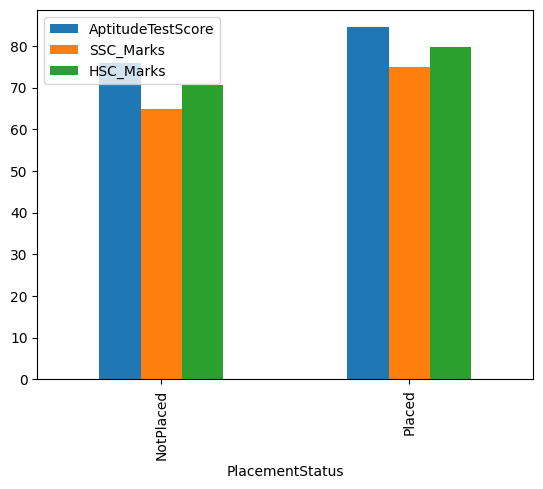

In [ ]:
df.groupby("PlacementStatus")[["AptitudeTestScore" , "SSC_Marks" , "HSC_Marks"]].mean().plot(kind ="bar")

In [ ]:
#Our dependent features are :CGPA , Internships , Projects
#workshops / Certifications , Aptitude Test Score , Soft Skills Rating
#Extra Curricular Activities , SSC_marks , HSC_marks

#Our independent and target is y:Placement Status ("Placed / Not Placed")


In [ ]:
X=df.drop(columns =["PlacementStatus" , "StudentID"] )

def training_Of_Model():

  numerical_cols = X.select_dtypes(include = [ "int64" , "float64"]).columns
  categorical_cols = X.select_dtypes(include = ["object"]).columns
  process_model = ColumnTransformer(transformers =[("num" , StandardScaler() , numerical_cols),
                                                   ("cat" , OneHotEncoder(drop="first", handle_unknown="ignore")
                                                   , categorical_cols)])

  X_train, X_test, y_train , y_test = train_test_split(X, y , test_size = 0.02,
                                                       random_state = 45 , stratify=y)
  accuracy = RandomForestClassifier(n_estimators=200 , random_state=45 , class_weight= "balanced")
  model= Pipeline(steps=[("process_model" ,process_model) , ("accuracy ", accuracy)])
  model.fit(X_train,y_train)
  return model


In [ ]:
def input_by_user():
  print("ENTER STUDENT'S DETAILS TO KNOW IT'S PLACEMENT STATUS")
  cgpa=float(input("Enter your's CGPA  : "))
  internships = int(input("Enter Number of internship done : "))
  project =int(input("Enter  number of Projects done : "))
  workshop_certificate = int(input("Enter number of workshop done / certificate you have : "))
  aptitude_score= int(input("Enter your Aptitude Score  : "))
  soft_skill=float(input("Enter your Soft Skill Rating  : "))
  extra_curricular=input("Enter Yes if extra curricular done else No :").capitalize()
  placement_train= input("Enter Yes if  you get placement training else No : ").capitalize()
  ssc=int(input("Enter your SSC Marks  : "))
  hsc=int(input("Enter your HSC Marks  : "))
  data_collected= {
      "CGPA" : cgpa,
      "Internships" : internships ,
      "Projects" : project ,
      "Workshops/Certifications" : workshop_certificate ,
      "AptitudeTestScore" : aptitude_score,
      "SoftSkillsRating" : soft_skill,
      "ExtracurricularActivities" : extra_curricular,
      "PlacementTraining" : placement_train,
      "SSC_Marks" : ssc ,
      "HSC_Marks" : hsc
  }
  return pd.DataFrame([data_collected])


In [4]:
will_placed =r"""
        __                   __                                          __                                             __              __          __
  ____ |  |__   ____   ____ |  | __  ___.__. ____  __ _________  ______ |  | _____    ____  ____   _____   ____   _____/  |_    _______/  |______ _/  |_ __ __  ______
_/ ___\|  |  \_/ __ \_/ ___\|  |/ / <   |  |/  _ \|  |  \_  __ \ \____ \|  | \__  \ _/ ___\/ __ \ /     \_/ __ \ /    \   __\  /  ___/\   __\__  \\   __\  |  \/  ___/
\  \___|   Y  \  ___/\  \___|    <   \___  (  <_> )  |  /|  | \/ |  |_> >  |__/ __ \\  \__\  ___/|  Y Y  \  ___/|   |  \  |    \___ \  |  |  / __ \|  | |  |  /\___ \
 \___  >___|  /\___  >\___  >__|_ \  / ____|\____/|____/ |__|    |   __/|____(____  /\___  >___  >__|_|  /\___  >___|  /__|   /____  > |__| (____  /__| |____//____  >
     \/     \/     \/     \/     \/  \/                          |__|             \/     \/    \/      \/     \/     \/            \/            \/                \/

"""

In [5]:
model_get=training_Of_Model()
happy= True
while happy:
  print("****_____WELCOME TO MODEL TO PREDICT YOUR PLACEMNT STATUS !____****")
  should_continue = input("Enter 'y' to continue or 'n' to exit from model ").lower()
  if should_continue =='y':
    print("/n"*30)
    print(will_placed)

    s1=input_by_user()
    probability= model_get.predict_proba(s1)[0,1]
    predicitibility = model_get.predict(s1)[0]

    print(f"Placement Probability {probability , 3}")
    print("Predicition :", "Placed" if predicitibility ==1 else "Not Placed")
  elif should_continue == 'n' :
    print ("Exiting !!")
    happy =False
  else:
     print("Enter correct pre- scribbed Input .")


NameError: name 'training_Of_Model' is not defined